In [6]:
# NIDHI CHAHAR, IIT KGP

# This notebook contains my code for the Capstone Project (Summer Analytics) 2025, IIT Guwahati.
# I have added comments to explain my code and show the basic workflow though the detailed explanation of my EDA and logic behind each model is explained in my report.

In [7]:
!pip install pathway bokeh --quiet

#### BASIC EDA and Feature Engineering

First let's understand patterns in our dataset and relationships between different columns.




In [8]:
import pathway as pw

# Importing relevant libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/content/dataset.csv")                      # Importing the dataset
df.head(8)

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
5,5,BHMBCCMKT01,577,26.144536,91.736172,177,car,low,3,0,04-10-2016,10:26:00
6,6,BHMBCCMKT01,577,26.144536,91.736172,219,truck,high,6,0,04-10-2016,10:59:00
7,7,BHMBCCMKT01,577,26.144536,91.736172,247,car,average,5,0,04-10-2016,11:25:00


In [10]:
df.info()                # gives basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18368 entries, 0 to 18367
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      18368 non-null  int64  
 1   SystemCodeNumber        18368 non-null  object 
 2   Capacity                18368 non-null  int64  
 3   Latitude                18368 non-null  float64
 4   Longitude               18368 non-null  float64
 5   Occupancy               18368 non-null  int64  
 6   VehicleType             18368 non-null  object 
 7   TrafficConditionNearby  18368 non-null  object 
 8   QueueLength             18368 non-null  int64  
 9   IsSpecialDay            18368 non-null  int64  
 10  LastUpdatedDate         18368 non-null  object 
 11  LastUpdatedTime         18368 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.7+ MB


In [11]:
-df.isnull().sum()

,0
ID,0
SystemCodeNumber,0
Capacity,0
Latitude,0
Longitude,0
Occupancy,0
VehicleType,0
TrafficConditionNearby,0
QueueLength,0
IsSpecialDay,0


In [12]:
# there are no null values in the dataset!

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# shows there are no duplicates in the dataset

In [15]:
df.describe()

,ID,Capacity,Latitude,Longitude,Occupancy,QueueLength,IsSpecialDay
count,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000,18368.000000
mean,9183.500000,1605.214286,25.706547,90.751170,731.084059,4.587925,0.150915
std,5302.529208,1131.153886,1.582749,3.536636,621.164982,2.580062,0.357975
min,0.000000,387.000000,20.000035,78.000003,2.000000,0.000000,0.000000
25%,4591.750000,577.000000,26.140048,91.727995,322.000000,2.000000,0.000000
50%,9183.500000,1261.000000,26.147482,91.729511,568.000000,4.000000,0.000000
75%,13775.250000,2803.000000,26.147541,91.736172,976.000000,6.000000,0.000000
max,18367.000000,3883.000000,26.150504,91.740994,3499.000000,15.000000,1.000000


In [16]:
# now lets gain some understanding of our columns and their relationship with each other
# we will first study individual columns then move on to study combinations of them

In [17]:
df['SystemCodeNumber'].unique()

array(['BHMBCCMKT01', 'BHMBCCTHL01', 'BHMEURBRD01', 'BHMMBMMBX01',
       'BHMNCPHST01', 'BHMNCPNST01', 'Broad Street', 'Others-CCCPS105a',
       'Others-CCCPS119a', 'Others-CCCPS135a', 'Others-CCCPS202',
       'Others-CCCPS8', 'Others-CCCPS98', 'Shopping'], dtype=object)

In [18]:
df['SystemCodeNumber'].value_counts()

,count
SystemCodeNumber,
BHMBCCMKT01,1312
BHMBCCTHL01,1312
BHMEURBRD01,1312
BHMMBMMBX01,1312
BHMNCPHST01,1312
BHMNCPNST01,1312
Broad Street,1312
Others-CCCPS105a,1312
Others-CCCPS119a,1312


In [19]:
# this shows there are equal number of records for each parking lot.
# now lets study this column with others

In [20]:
df.groupby('SystemCodeNumber')['Capacity'].value_counts()

,,count
SystemCodeNumber,Capacity,
BHMBCCMKT01,577,1312
BHMBCCTHL01,387,1312
BHMEURBRD01,470,1312
BHMMBMMBX01,687,1312
BHMNCPHST01,1200,1312
BHMNCPNST01,485,1312
Broad Street,690,1312
Others-CCCPS105a,2009,1312
Others-CCCPS119a,2803,1312


In [21]:
# this shows that capacity of each lot is different
# now studying just 'Occupancy' with 'SystemCodeNumber' is meaningless as different lots have different capacities
# so we will introduce a new column 'OccupancyRate'

In [22]:
df['OccupancyRate'] = df['Occupancy'] / df['Capacity']

/tmp/ipython-input-23-1817090332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_occupancy_rate.index, y= avg_occupancy_rate.values, palette='cool')


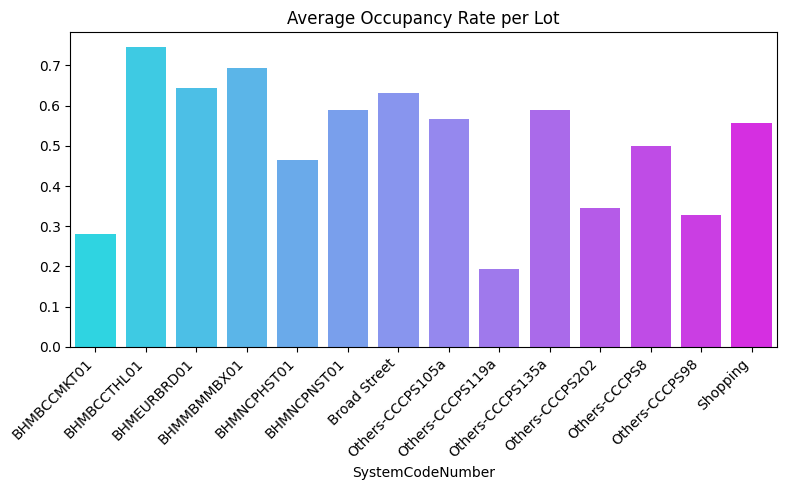

In [23]:
avg_occupancy_rate = df.groupby('SystemCodeNumber')['OccupancyRate'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x= avg_occupancy_rate.index, y= avg_occupancy_rate.values, palette='cool')
plt.title('Average Occupancy Rate per Lot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()                 # adjust the layout so nothing is cut off
plt.show()

In [24]:
# this shows that lots like 'BHMBCCTHL01' and 'BHMMBMMBX01' are among the busiest
# while lots like 'Others-CCCPS119a' and 'BHMBCCMKT01' are among the least used ones

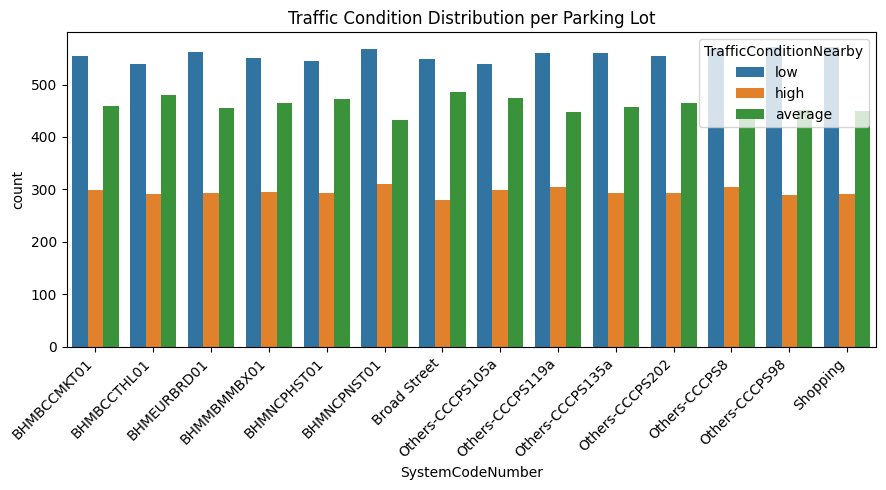

In [25]:
plt.figure(figsize=(9,5))
sns.countplot(
    x='SystemCodeNumber',
    hue='TrafficConditionNearby',
    data=df
)                         # shows traffic patterns across different lots

plt.xticks(rotation=45, ha='right')
plt.title('Traffic Condition Distribution per Parking Lot')
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-1264028789.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_queue.index, y=avg_queue.values, palette='viridis')


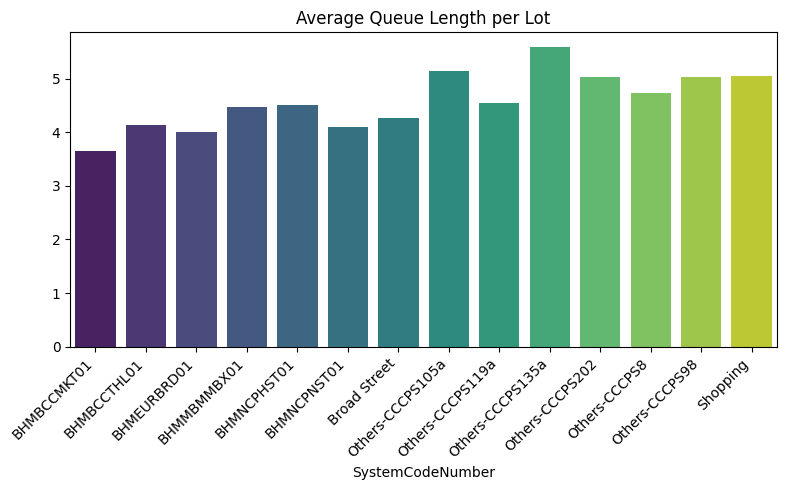

In [26]:
# now lets take a look at 'QueueLength' with respect to each lot
avg_queue= df.groupby('SystemCodeNumber')['QueueLength'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_queue.index, y=avg_queue.values, palette='viridis')
plt.title('Average Queue Length per Lot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [27]:
# Note: it doesnot make any sense to look at 'TrafficConditionNearby' alone so we will look at it along with other columns

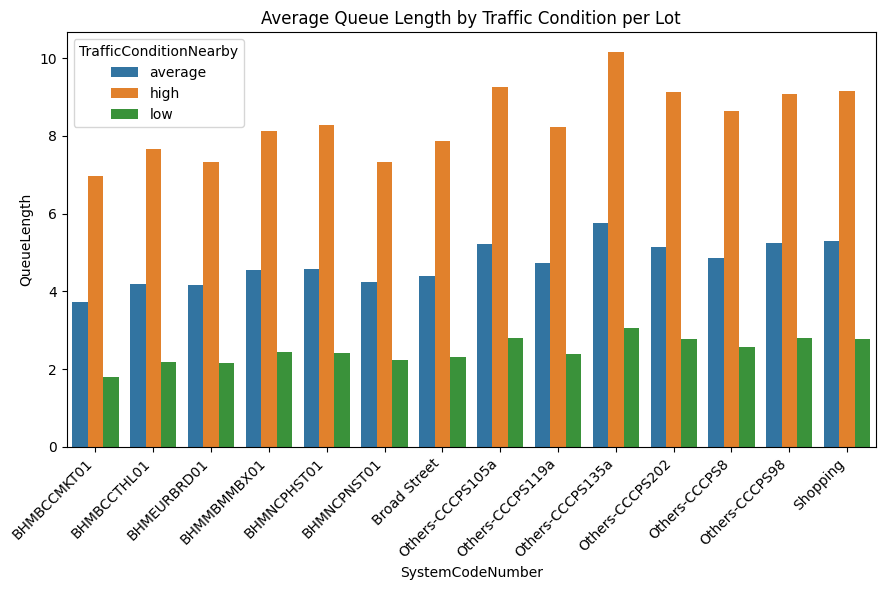

In [28]:
# avg queue length and Traffic at each lot

avg_queue_traffic= df.groupby(['SystemCodeNumber', 'TrafficConditionNearby'])['QueueLength'].mean()
avg_queue_traffic= avg_queue_traffic.reset_index()

plt.figure(figsize=(9,6))
sns.barplot(x='SystemCodeNumber', y='QueueLength', hue='TrafficConditionNearby', data= avg_queue_traffic)
plt.title('Average Queue Length by Traffic Condition per Lot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

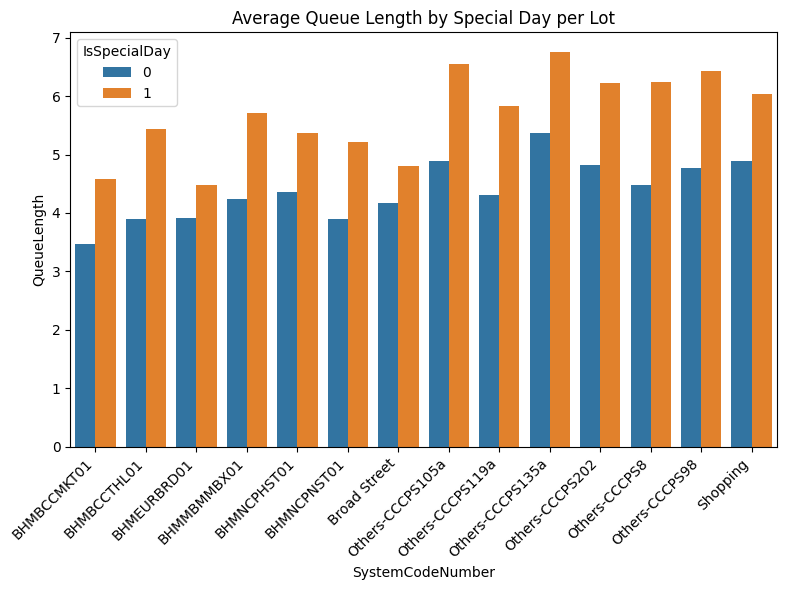

In [29]:
# now lets take a look at 'QueueLength' with 'IsSpecialDay' at each lot

avg_queue_special_day=  df.groupby(['SystemCodeNumber', 'IsSpecialDay'])['QueueLength'].mean()
avg_queue_special_day= avg_queue_special_day.reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='SystemCodeNumber', y='QueueLength', hue='IsSpecialDay', data= avg_queue_special_day)
plt.title('Average Queue Length by Special Day per Lot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


In [30]:
# we can see that 'QueueLength' is higher across all lots on special days (like holidays and festivals)

In [31]:
# now we cannot study the relation of occupancy with time directly, we need to add a column 'Timestamp'

df["Timestamp"] = pd.to_datetime(df["LastUpdatedDate"] + " " + df["LastUpdatedTime"], format='%d-%m-%Y %H:%M:%S')               # combine date and time column

# To study how the occupancy rate varies with each hour, let's add another column named 'Hour'
df['Hour'] = df['Timestamp'].dt.hour
df.head()

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,OccupancyRate,Timestamp,Hour
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,0.105719,2016-10-04 07:59:00,7
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,0.110919,2016-10-04 08:25:00,8
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,0.138648,2016-10-04 08:59:00,8
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,0.185442,2016-10-04 09:32:00,9
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,0.259965,2016-10-04 09:59:00,9


/tmp/ipython-input-32-1013587691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= avg_occ_hour['Hour'], y= avg_occ_hour['OccupancyRate'], palette='plasma')


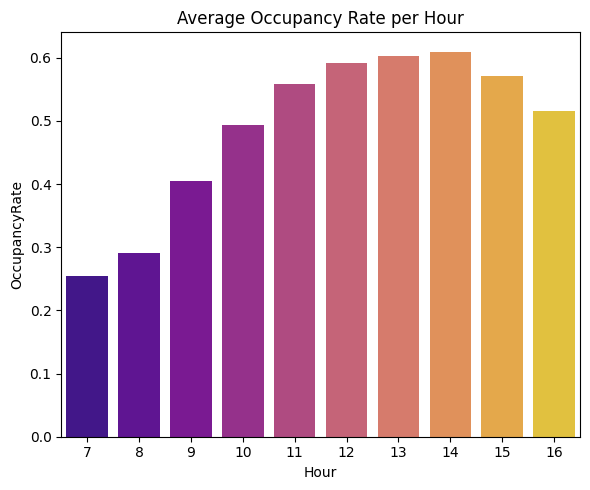

In [32]:
avg_occ_hour= df.groupby('Hour')['OccupancyRate'].mean()
avg_occ_hour= avg_occ_hour.reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x= avg_occ_hour['Hour'], y= avg_occ_hour['OccupancyRate'], palette='plasma')
plt.title('Average Occupancy Rate per Hour')
plt.tight_layout()

/tmp/ipython-input-33-3911581795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='OccupancyRate', data=df, palette='cool')


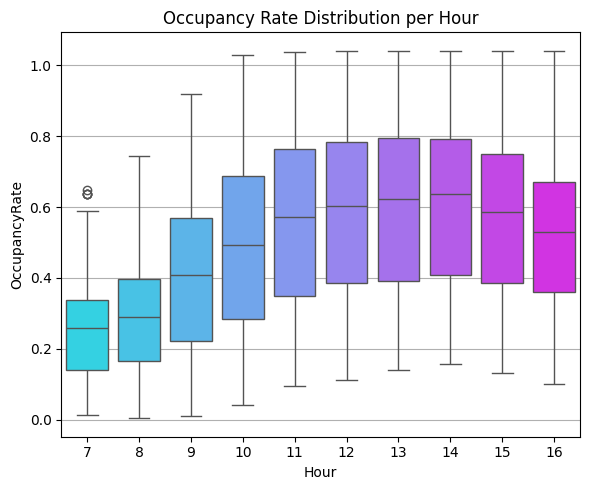

In [33]:
plt.figure(figsize=(6,5))                                                                 # this is one of the most important plot of EDA
sns.boxplot(x='Hour', y='OccupancyRate', data=df, palette='cool')
plt.title('Occupancy Rate Distribution per Hour')
plt.grid(axis='y')
plt.tight_layout()

In [34]:
# the above plots show that occupancy is max around 12 to 2 (peak hours)
# this forms the basis for Temporal Coefficient later when we determine the price function

In [35]:
# for the calculation of the Temporal Coefficient, we will need more column named 'avg_occupancy_per_lot'
# this is average_occupancy across all hours for each lot

df['avg_occupancy_per_lot']= 0

for lot in df['SystemCodeNumber'].unique():
  avg_occ = df.loc[ df['SystemCodeNumber']==lot, 'Occupancy'].mean()
  df.loc[ df['SystemCodeNumber']==lot, 'avg_occupancy_per_lot' ] = avg_occ

df.head()

/tmp/ipython-input-35-1590275414.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '162.0297256097561' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ df['SystemCodeNumber']==lot, 'avg_occupancy_per_lot' ] = avg_occ


,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,OccupancyRate,Timestamp,Hour,avg_occupancy_per_lot
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,0.105719,2016-10-04 07:59:00,7,162.029726
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00,0.110919,2016-10-04 08:25:00,8,162.029726
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00,0.138648,2016-10-04 08:59:00,8,162.029726
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00,0.185442,2016-10-04 09:32:00,9,162.029726
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00,0.259965,2016-10-04 09:59:00,9,162.029726


/tmp/ipython-input-36-3598778291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VehicleType', data=df, palette='magma')


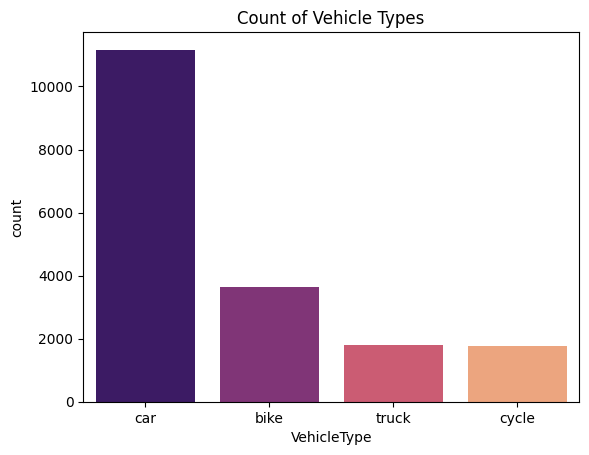

In [36]:
# now lets look at 'VehicleType' column
sns.countplot(x='VehicleType', data=df, palette='magma')
plt.title('Count of Vehicle Types')
plt.show()

In [37]:
# this shows that majority proportion of vehicles are cars ( more in number than the sum of rest three vehicles).

/tmp/ipython-input-38-2843431589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='QueueLength', y='VehicleType', data=df, palette='coolwarm' )       # for understanding the variation in Queue length wrt types of vehicles


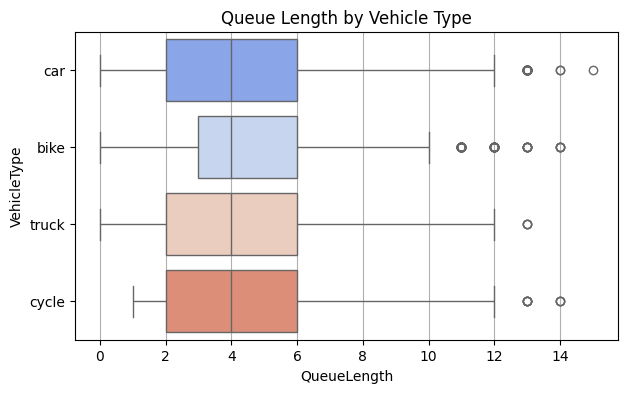

In [38]:
plt.figure(figsize=(7,4))
sns.boxplot(x='QueueLength', y='VehicleType', data=df, palette='coolwarm' )       # for understanding the variation in Queue length wrt types of vehicles
plt.title('Queue Length by Vehicle Type')
plt.grid(axis='x')

/tmp/ipython-input-39-2782275050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'OccupancyRate', y='VehicleType', data=df, palette='plasma')                 # for understanding the variation in occupancy rate wrt types of vehicles


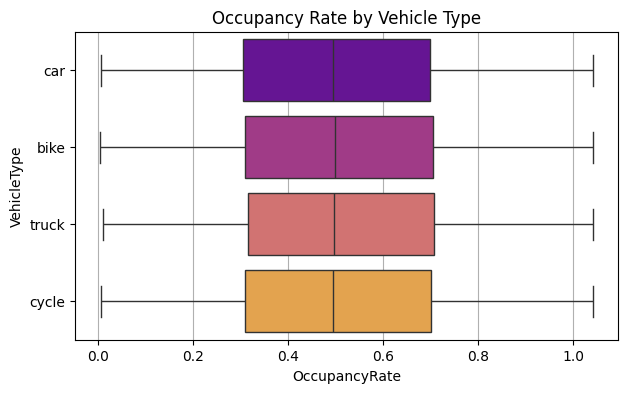

In [39]:
plt.figure(figsize=(7,4))
sns.boxplot(x= 'OccupancyRate', y='VehicleType', data=df, palette='plasma')                 # for understanding the variation in occupancy rate wrt types of vehicles
plt.title('Occupancy Rate by Vehicle Type')
plt.grid(axis='x')
plt.show()

/tmp/ipython-input-40-123075613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsSpecialDay', data= df, palette='cool')


Text(0.5, 1.0, 'Count of Special vs Normal Days')

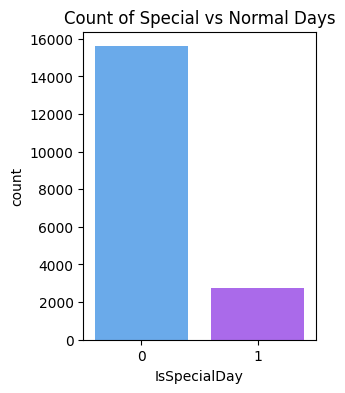

In [40]:
#now lets look at 'IsSpecialDay' column

plt.figure(figsize=(3,4))
sns.countplot(x='IsSpecialDay', data= df, palette='cool')
plt.title('Count of Special vs Normal Days')

/tmp/ipython-input-41-3376959837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsSpecialDay', y='OccupancyRate', data=df, palette='plasma')


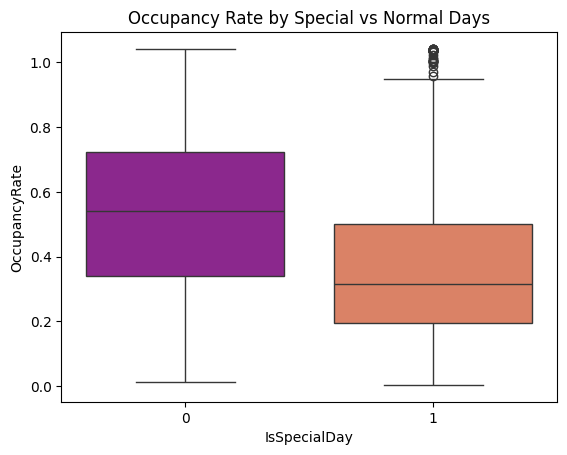

In [41]:
sns.boxplot(x='IsSpecialDay', y='OccupancyRate', data=df, palette='plasma')
plt.title('Occupancy Rate by Special vs Normal Days')
plt.show()

In [42]:
# this shows that median OccupancyRate is higher on non special days

In [43]:
# now that we have done our basic EDA and developed a institution for how each column interacts with each other, we will move on to Model 1

#### MODEL 1
*Baseline Model*

 A Linear Model for calculating dynamic prices for each parking lot for all 73  days (on all hours throughout a day)  

 Price = base_price + alpha x (occupancy/capacity) + beta x(Temporal_Coeff)

In [44]:
# select columns that we will need for streaming or downstream processing
model1_df = df[["SystemCodeNumber", "Timestamp", "Occupancy", "Capacity", "avg_occupancy_per_lot"]]  # selecting the columns that we need for

# Save the selected columns to a CSV file
model1_df.to_csv("parking_stream.csv", index=False)

In [45]:
# Define the schema for the streaming data using Pathway
# This schema specifies the expected structure of each data row in the stream

class ParkingSchema(pw.Schema):
    SystemCodeNumber: str
    Timestamp: str
    Occupancy: int
    Capacity: int
    avg_occupancy_per_lot: float


# Load the data as a simulated stream using Pathway's replay_csv function
# input_rate=1000 means approximately 1000 rows per second will be ingested into the stream.

data = pw.demo.replay_csv("parking_stream.csv", schema=ParkingSchema, input_rate=1000)

In [46]:
# Define the datetime format to parse the 'Timestamp' column
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:

data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),                                                                                # contains the parsed full datetime
    lot_day_hour = data.SystemCodeNumber + "_" + data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d %H:00:00"),      # combines 'SystemCodeNumber' with day and keeps only the hour part of time (used for making windows of the streaming data below )
    day= data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d")                                                        # extracts the date part and resets the time to midnight
)

In [47]:
# Define a daily tumbling window over the data stream using Pathway
# This block performs temporal aggregation and computes a dynamic price for each hour of a day

hourly = (
    data_with_time.windowby(
        pw.this.t,                                                              # Event time column to use for windowing (parsed datetime)
        instance=pw.this.lot_day_hour,                                          # Making a window for each unique lot_day_hour combination
        window=pw.temporal.tumbling(datetime.timedelta(hours=1)),               # Creating non-overlapping 1-hour windows
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        lot_id=pw.reducers.max(pw.this.SystemCodeNumber),
        t= pw.reducers.max(pw.this.t),
        occ = pw.reducers.avg(pw.this.Occupancy),                               # Calculating average occupancy for the hour (this is occupancy for that lot for that specific hour on that specific day)
        cap=pw.reducers.max(pw.this.Capacity),                                  # Calculating average capacity for the hour
        avg_occ_per_lot=pw.reducers.max(pw.this.avg_occupancy_per_lot)          # Calculating average occupancy per lot
    )
    .with_columns(
        # price = base_price + alpha x (occ/cap) + beta x(Temporal_Coeff)

        # Temporal_Coeff= Occupancy_Ratio_Of_That_Hour / Overall_Avg_Occupancy_Ratio
        # Occupancy_Ratio_Of_That_Hour= occ/cap
        # Overall_Avg_Occupancy_Ratio= average occupancy ratio across all hours for that lot = avg_occupancy_per_lot
        # ---> Temporal_Coeff= occ/ avg_occ_per_lot

        # alpha= 5
        # beta= 2
        # base_price= 10 (given in problem statement)


        price= 10 + 5*(pw.this.occ/pw.this.cap) + 2*(pw.this.occ/ pw.this.avg_occ_per_lot)
)
)

In [48]:
#importing relevant libraries:
import bokeh.plotting
import bokeh.io
import bokeh.models as bm
import panel as pn
pn.extension()
from bokeh.plotting import output_notebook, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
import datetime
import time
from bokeh.palettes import Category20


def create_lot_plotter(lot_id):

    def lot_price_plotter(source):
        # Create a Bokeh figure with datetime x-axis
        fig = bokeh.plotting.figure(
            height=500,
            width=1000,
            title=f"Lot {lot_id}: Dynamic Parking Price",
            x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
            tools="pan,wheel_zoom,box_zoom,reset,save,hover" # Add tools for interaction
        )

        # Plot a line graph showing how the price evolves over time
        # Reference columns directly from the provided source
        fig.line("t", "price", source=source, line_width=2, color="navy")

        # Overlay red circles at each data point for better visibility
        # Reference columns directly from the provided source
        fig.circle("t", "price", source=source, size=4, color="red")

        fig.legend.location = "top_left"

        return fig

    return lot_price_plotter

In [49]:

lot_id= 'BHMBCCMKT01'          # I have demonstrated real time plot for only one lot as it is not possible to demonstrate real time plots for all 14 lots (and the project demands the plots to be updated in real time)
                               # one can simply view the real time plot for any lot by changing lot_id variable here


# Filter the 'hourly' stream for the current lot_id
lot_data_window = hourly.filter(hourly['lot_id'] == lot_id)

      # Create the plotter function for this specific lot
lot_plotter = create_lot_plotter(lot_id)

      # Use Pathway's built-in .plot() method to bind the data stream to the Bokeh plot
      # - 'lot_plotter' is the rendering function
      # - 'sorting_col="t"' ensures the data is plotted in time order
viz = lot_data_window.plot(lot_plotter, sorting_col="t")

pn.Column(viz).servable()

/tmp/ipython-input-48-1865424926.py:34: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  fig.legend.location = "top_left"


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [50]:
pw.run()

Output()

# **MODEL** **2**
####*Exponential Pricing Model that uses demand-based price function*

A mathematical demand function using key features: Occupancy rate, Queue length Traffic level, Special day, Vehicle type


DemandScore = 0.3 × OccupancyRatio + 0.3 × NormQueueLength + (-0.15) × IsSpecialDay + 0.15 × VehicleTypeWeight + 0.2 × TrafficConditionWeight + 0.2 x hour_weight


Price = BasePrice × (1 + lambda × NormalizedDemand²)



In [51]:
#making a dataframe by selecting required columns
model2_df = df[["SystemCodeNumber", "Timestamp", "Occupancy", "Capacity", "avg_occupancy_per_lot", "VehicleType", "TrafficConditionNearby", "QueueLength", "IsSpecialDay" ]]

#converting to CSV file
model2_df.to_csv("model2.csv", index=False)

In [52]:
# Define the schema for the streaming data

class ParkingSchema(pw.Schema):
    SystemCodeNumber: str
    Timestamp: str
    Occupancy: int
    Capacity: int
    avg_occupancy_per_lot: float
    VehicleType: str
    TrafficConditionNearby: str
    QueueLength: int
    IsSpecialDay: int

data = pw.demo.replay_csv("model2.csv", schema=ParkingSchema, input_rate=100)

In [53]:
fmt = "%Y-%m-%d %H:%M:%S"

# Add new columns to the data stream:
data_with_time = data.with_columns(
    t = data.Timestamp.dt.strptime(fmt),
    lot_day_hour_vehicle_traffic = data.SystemCodeNumber + "_" + data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d %H:00:00") + "_" + data.VehicleType + "_" + data.TrafficConditionNearby,     #combines lot, day, hour, vehicle, traffic (used for making windows of the streaming data below )
    day= data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%d")                                                                                                                                    # extracts the date part
)

In [54]:
# weights and coefficients
vehicle_type_weights = {'car': 1.0, 'bike': 0.8, 'truck': 1.2, 'cycle': 0.7}            # for different vehicle types
traffic_condition_weights = {'low': 0.3, 'medium': 0.6, 'high': 1.0}                    # for different traffic conditions
alpha, beta, gamma, delta, epsilon, zeta = 0.3, 0.3, -0.15, 0.15, 0.2, 0.2              # coefficients for multiplying (used in calculate_demand_score function)

# Pathway User-Defined Functions (UDFs)
@pw.udf
def get_vehicle_weight(vehicle_type: str) -> float:                                     # for calculating vehicle weight
    return vehicle_type_weights.get(vehicle_type.lower(), 1.0)

@pw.udf
def get_traffic_weight(traffic_condition: str) -> float:                               # for calculating traffic weight
    return traffic_condition_weights.get(traffic_condition.lower(), 0.5)

@pw.udf
def calculate_demand_score(occ_ratio: float, norm_queue: float, special_day: int,
                          vehicle_weight: float, traffic_weight: float, hour_weight: float) -> float:     # for calculating demand score
    score = (alpha * occ_ratio + beta * norm_queue + gamma * special_day +
             delta * vehicle_weight + epsilon * traffic_weight + zeta * hour_weight )
    return max(0.0, score)

@pw.udf
def calculate_price(norm_demand: float, base_price: float = 10.0) -> float:                               # for calculating price
    # exponential pricing model
    #lambda= 0.8
    multiplier = 1 + 0.8 * (norm_demand ** 2)
    return round(base_price * min(multiplier, 2.0), 2)


In [55]:
from datetime import timedelta

model2_hourly = (
    data_with_time.windowby(
        pw.this.t,
        instance=pw.this.lot_day_hour_vehicle_traffic,
        window=pw.temporal.tumbling(timedelta(hours=1)),
        behavior=pw.temporal.exactly_once_behavior()
    )
    .reduce(
        lot_id=pw.reducers.max(pw.this.SystemCodeNumber),
        t= pw.reducers.max(pw.this.t),
        occ = pw.reducers.avg(pw.this.Occupancy),                               # Calculating average occupancy for the hour (this is occupancy for that lot for that specific hour on that specific day)
        cap=pw.reducers.max(pw.this.Capacity),                                  # Calculating average capacity for the hour
        avg_occ=pw.reducers.max(pw.this.avg_occupancy_per_lot),                 # Calculating average occupancy per lot
        vehicle= pw.reducers.any(pw.this.VehicleType),                          # Calculating average vehicle type for the hour
        traffic= pw.reducers.any(pw.this.TrafficConditionNearby),               # Calculating average traffic level for the hour
        special_day=pw.reducers.any(pw.this.IsSpecialDay),
        queue= pw.reducers.avg(pw.this.QueueLength)                             # Calculating average queue length for the hour
    )
    .with_columns(
        vehicle_weight= get_vehicle_weight(pw.this.vehicle),
        traffic_weight= get_traffic_weight(pw.this.traffic),

        hour_weight= pw.this.occ/ pw.this.avg_occ,

        occ_ratio= pw.this.occ/ pw.this.cap,
        norm_queue= pw.this.queue/ 15,     # df['QueueLength'].max()= 1

    )
    .with_columns(

        # ---> hour_weight= Temporal_Coeff
        # Temporal_Coeff= occ/ Avg_Occupancy(per_lot)

        #DemandScore = 0.3 × OccupancyRatio + 0.3 × NormQueueLength +
        #     (-0.15) × IsSpecialDay + 0.15 × VehicleTypeWeight +
        #     0.2 × TrafficConditionWeight + 0.2 x hour_weight

        demand_score= calculate_demand_score(pw.this.occ_ratio, pw.this.norm_queue, pw.this.special_day,
                                             pw.this.vehicle_weight, pw.this.traffic_weight, pw.this.hour_weight)

    )
    .with_columns(
        #Price = BasePrice × (1 + lambda × NormalizedDemand²)
        price= calculate_price(pw.this.demand_score)

    )

)

In [56]:
import bokeh.plotting
import bokeh.io
import panel as pn
from bokeh.plotting import output_notebook, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
import datetime
import time
from bokeh.palettes import Category20
from collections import defaultdict


def create_lot_plotter(lot_id):

    def lot_price_plotter(source):
        # Create a Bokeh figure with datetime x-axis
        fig = bokeh.plotting.figure(
            height=500,
            width=1000,
            title=f"Lot {lot_id}: Dynamic Parking Price",
            x_axis_type="datetime",  # Ensure time-based data is properly formatted on the x-axis
            tools="pan,wheel_zoom,box_zoom,reset,save,hover" # Add tools for interaction
        )

        # Plot a line graph showing how the price evolves over time
        # Reference columns directly from the provided source
        fig.line("t", "price", source=source, line_width=2, color="navy")

        # Overlay red circles at each data point for better visibility
        # Reference columns directly from the provided source
        fig.circle("t", "price", source=source, size=4, color="red")

        fig.legend.location = "top_left"

        return fig

    return lot_price_plotter

In [57]:

lot_id= 'BHMBCCMKT01'          # I have demonstrated real time plot for only one lot as it is not possible to demonstrate real time plots for all 14 lots (and the project demands the plots to be updated in real time)
                               # one can simply view the real time plot for any lot by changing lot_id variable here


# Filter the 'model2_hourly' stream for the current lot_id
lot_data_window = model2_hourly.filter(model2_hourly['lot_id'] == lot_id)

      # Create the plotter function for this specific lot
lot_plotter = create_lot_plotter(lot_id)

      # Use Pathway's built-in .plot() method to bind the data stream to the Bokeh plot
      # - 'lot_plotter' is the rendering function
      # - 'sorting_col="t"' ensures the data is plotted in time order
viz = lot_data_window.plot(lot_plotter, sorting_col="t")

pn.Column(viz).servable()

/tmp/ipython-input-56-1742753381.py:32: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  fig.legend.location = "top_left"


Column
    [0] Column
        [0] Row
            [0] Markdown(str)
            [1] TooltipIcon(value='Table depends o...)
        [1] Bokeh(figure)

In [58]:
pw.run()

Output()